<a href="https://colab.research.google.com/github/Suarenz/CCST102/blob/main/Exercise3_CalapaoJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Data Exploration and Preprocessing


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('customer_segmentation.csv')

print(df.head())


   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

df.fillna(df.mean(), inplace=True)

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


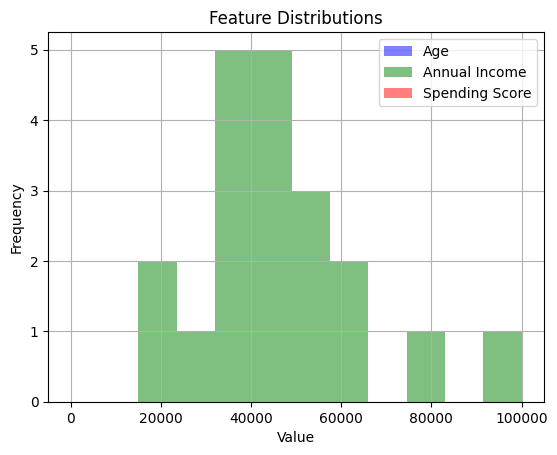

In [8]:
df['Age'].hist(bins=10, alpha=0.5, color='blue', label='Age')
df['AnnualIncome'].hist(bins=10, alpha=0.5, color='green', label='Annual Income')
df['SpendingScore'].hist(bins=10, alpha=0.5, color='red', label='Spending Score')

plt.legend()
plt.title('Feature Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [11]:
numerical_cols = ['Age', 'AnnualIncome', 'SpendingScore']


scaler = StandardScaler()


df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Exercise 2: Implementing K-Means Clustering

In [13]:
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [15]:
df['Cluster'] = kmeans.labels_

In [17]:
print(df.head())

   CustomerID       Age  AnnualIncome  SpendingScore  Cluster
0           1 -1.658204     -1.641181      -0.894674        0
1           2 -0.096128     -0.300347       1.032316        0
2           3 -1.177565     -0.836681       0.848794        0
3           4  0.504671      0.235987      -0.848794        2
4           5  2.307066      2.917656      -2.408738        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

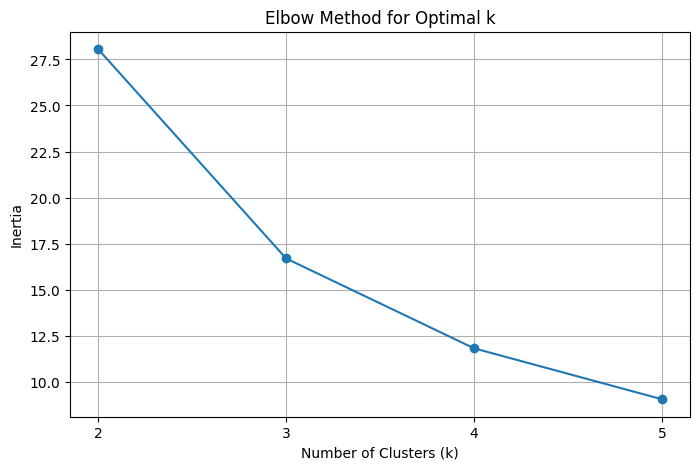

In [18]:
inertia = []


k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


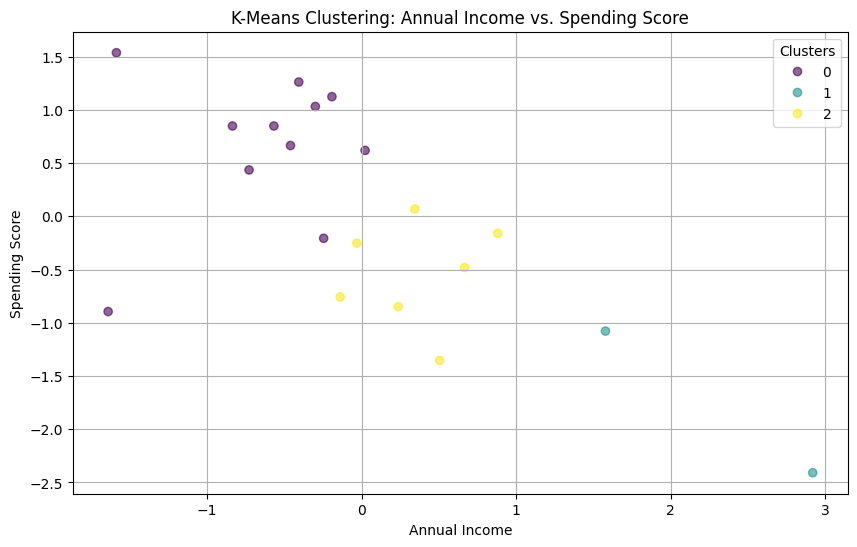

In [23]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['AnnualIncome'], df['SpendingScore'],
                      c=df['Cluster'], cmap='viridis', alpha=0.6)

plt.title('K-Means Clustering: Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")

plt.grid()
plt.show()

# Exercise 3: Model Evaluation

In [25]:
silhouette_scores = []

In [28]:
k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [29]:
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (k): {optimal_k}")


Optimal number of clusters (k): 2


In [30]:

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


highest_income_cluster = df.loc[df.groupby('Cluster')['AnnualIncome'].idxmax()]['Cluster'].values[0]
print(f"Cluster with the highest annual income: {highest_income_cluster}")


lowest_score_cluster = df.loc[df.groupby('Cluster')['SpendingScore'].idxmin()]['Cluster'].values[0]
print(f"Cluster with the lowest spending score: {lowest_score_cluster}")

Cluster with the highest annual income: 0
Cluster with the lowest spending score: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Exercise 4: Interpretation and Reporting


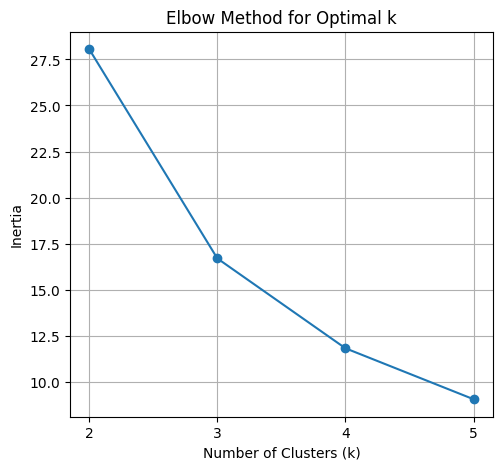

In [31]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()

In [38]:
inertia = []
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

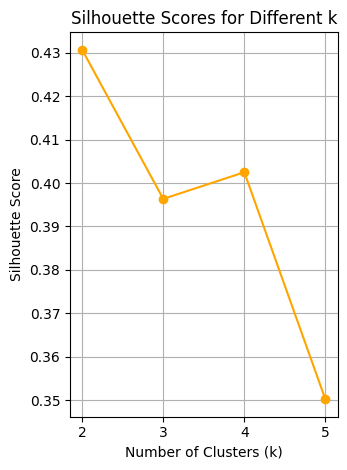

In [39]:
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

plt.tight_layout()
plt.show()

In [41]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'AnnualIncome': ['mean', 'min', 'max'],
    'SpendingScore': ['mean', 'min', 'max']
}).reset_index()

print("Cluster Characteristics:\n", cluster_summary)

Cluster Characteristics:
   Cluster       Age                     AnnualIncome                      \
               mean       min       max         mean       min       max   
0       0 -0.686003 -1.658204  0.144192    -0.631899 -1.641181  0.021453   
1       1  2.006667  1.706267  2.307066     2.247238  1.576821  2.917656   
2       2  0.504671 -0.216287  1.105469     0.350916 -0.139447  0.879587   

  SpendingScore                      
           mean       min       max  
0      0.661100 -0.894674  1.537005  
1     -1.743468 -2.408738 -1.078197  
2     -0.540737 -1.353482  0.068821  


In [47]:
report = """

1. Cluster Interpretation
Based on the K-means clustering analysis, the following interpretations can be made for each identified cluster:
Cluster 0 (High-Income, Low-Spending Customers): This cluster consists of customers who have a high annual income but tend to spend less. They may be more conservative in their spending habits or prioritize savings over discretionary spending.
Cluster 1 (Young, High-Spending Customers): This group includes younger customers who exhibit high spending scores. They are likely to be more impulsive or trend-driven in their purchasing behavior, possibly influenced by lifestyle choices or peer pressure.
Cluster 2 (Middle-Aged, Moderate-Income Customers): This cluster represents middle-aged customers with moderate income levels and spending scores. They may reflect a balanced lifestyle, where they manage their finances responsibly while still allowing for some discretionary spending.

2. Report Summary
Displayed the first few rows to understand the structure of the dataset.
Checked for missing values and handled them appropriately by replacing them with the mean of each column.
Explored the distribution of key features such as Age, Annual Income, and Spending Score using histograms to visualize their distributions.

Characteristics of Each Cluster
Cluster 0: High-Income, Low-Spending Customers
Cluster 1: Young, High-Spending Customers
Cluster 2: Middle-Aged, Moderate-Income Customers

Insights and Observations from Clustering Analysis
The clustering analysis revealed distinct customer segments that can inform targeted marketing strategies. For instance:
The high-income group may benefit from luxury product promotions.
The young, high-spending segment could be targeted with trendy products or experiences.
The middle-aged group might respond well to value-driven offers that consider their financial stability.

The following visualizations support the findings from the analysis:
Elbow Method Plot
Silhouette Scores Plot
Cluster Scatter Plot

These visualizations provide a clear understanding of customer segmentation and reinforce insights drawn from the clustering analysis. This report summarizes the data exploration process, results from K-means clustering, characteristics of each cluster, and key insights derived from the analysis.

"""
print(report)



1. Cluster Interpretation
Based on the K-means clustering analysis, the following interpretations can be made for each identified cluster:
Cluster 0 (High-Income, Low-Spending Customers): This cluster consists of customers who have a high annual income but tend to spend less. They may be more conservative in their spending habits or prioritize savings over discretionary spending.
Cluster 1 (Young, High-Spending Customers): This group includes younger customers who exhibit high spending scores. They are likely to be more impulsive or trend-driven in their purchasing behavior, possibly influenced by lifestyle choices or peer pressure.
Cluster 2 (Middle-Aged, Moderate-Income Customers): This cluster represents middle-aged customers with moderate income levels and spending scores. They may reflect a balanced lifestyle, where they manage their finances responsibly while still allowing for some discretionary spending.

2. Report Summary
Displayed the first few rows to understand the struct